##       Titanic Data Set
#### @uthor: Dhairya


Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the data set and setting the independent and dependent variable

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Checking if there is any NULL values in our Dataset

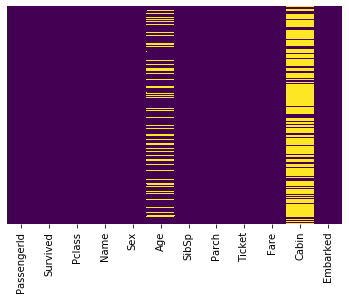

In [3]:
train.isnull()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#number of survival 

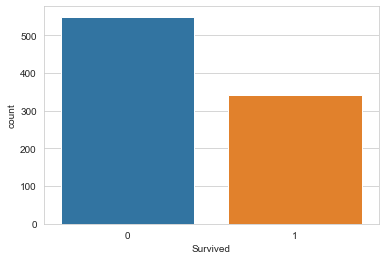

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

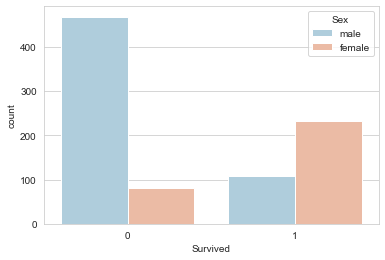

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

#histagram for age to see the distribution

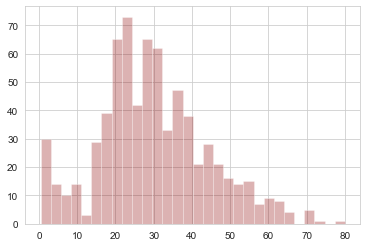

In [6]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

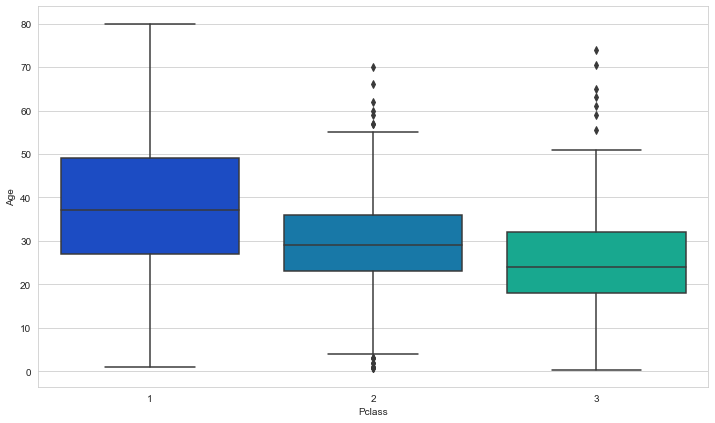

In [7]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

#We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 
#We'll use these average age values to impute based on Pclass for Age.

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [9]:
#Finding the missing values for age    
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train.drop('Cabin',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


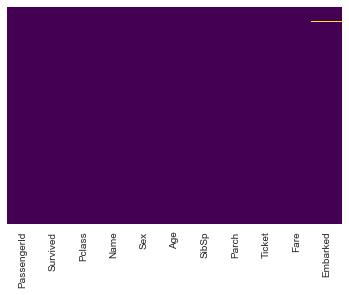

In [10]:
#Using heatmap to plot the data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
train.info()

In [11]:
#Converting catagorical values into numbers
sex = pd.get_dummies(train['Sex'], drop_first = True)
Emb = pd.get_dummies(train['Embarked'], drop_first = True)
train.drop(['Sex', 'PassengerId','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex, Emb],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [12]:
#Splitting the dataset into dependent and independent
X = train.drop(['Survived'], axis = 1)
y = train['Survived']
print(X.head())
print(y.head())

   Pclass   Age  SibSp  Parch     Fare  male  Q  S
0       3  22.0      1      0   7.2500     1  0  1
1       1  38.0      1      0  71.2833     0  0  0
2       3  26.0      0      0   7.9250     0  0  1
3       1  35.0      1      0  53.1000     0  0  1
4       3  35.0      0      0   8.0500     1  0  1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [13]:
#Using RandomForestClassifier for training the model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(bootstrap=True, class_weight=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=16,
                       min_weight_fraction_leaf=0.0,
                       n_jobs=-1, oob_score=True, random_state=1)
random_forest.fit(X, y)


E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [14]:
#Predicting the survivals from test data
pred = random_forest.predict(X)
print(pred)

[0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 

In [15]:
#Checking the accuracy
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y,pred)
print(accuracy)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y,pred)
print(accuracy)


[[516  33]
 [ 82 260]]
0.8709315375982043
